## Setup and Load Data

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from rgf.sklearn import RGFClassifier
from catboost import CatBoostClassifier

In [174]:
df= pd.read_excel('Data Extract for Machine Learning 20201213.xlsx')
df.shape

(2981, 30)

In [175]:
df.head()

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,...,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,address,requested_amount,purpose,proposed_payday,credit_score,location
0,3600.0,1277.64,4877.64,21 days,35.49,1,RUNNING,Mastercard,102023.0,Guaranty Trust Bank,...,Agriculture,"10,000 - 54,999",2017-10-07 01:00:00,0,Umuahia,12000.0,Business,30 days,63.040,abia
1,10000.0,500.00,0.00,1 days,5.00,2,SETTLED,Visa,NaN,NaN,...,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,Umuahia,15000.0,Personal,30 days,65.220,abia
2,10000.0,500.00,0.00,1 days,5.00,2,SETTLED,Mastercard,92023.0,United Bank for Africa,...,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,Umuahia,15000.0,Personal,30 days,65.220,abia
3,3600.0,1277.64,5573.64,21 days,35.49,5,PAST DUE,Mastercard,22023.0,United Bank for Africa,...,Agriculture,"10,000 - 54,999",2007-07-01 00:00:00,0,Aba,15000.0,Medical,30 days,66.904,abia
4,5000.0,424.11,0.00,30 days,8.60,2,SETTLED,Mastercard,42022.0,Polaris Bank,...,Information Technology,"100,000 - 199,999",2002-01-01 00:00:00,0,NaN,20000.0,Medical,30 days,68.670,abia


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amount             2981 non-null   float64       
 1   interest_due            2981 non-null   float64       
 2   amount_due              2981 non-null   float64       
 3   tenor                   2981 non-null   object        
 4   interest_rate           2958 non-null   float64       
 5   status_id               2981 non-null   int64         
 6   status                  2981 non-null   object        
 7   card_network            2981 non-null   object        
 8   card_expiry             2941 non-null   float64       
 9   bank                    2941 non-null   object        
 10  phone_network           2981 non-null   int64         
 11  date_of_birth           2981 non-null   datetime64[ns]
 12  tier                    2472 non-null   object  

## Visualizing the Target Value

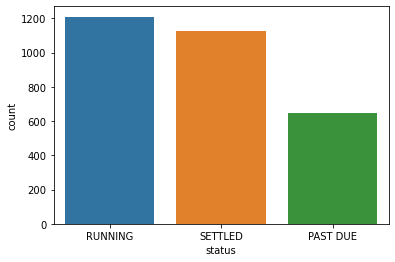

In [177]:
sns.countplot(x= df['status'])

## Filling Missing Values

In [178]:
df.dtypes

loan_amount                      float64
interest_due                     float64
amount_due                       float64
tenor                             object
interest_rate                    float64
status_id                          int64
status                            object
card_network                      object
card_expiry                      float64
bank                              object
phone_network                      int64
date_of_birth             datetime64[ns]
tier                              object
selfie_id_check                   object
gender                            object
marital_status                    object
no_of_dependent                   object
type_of_residence                 object
educational_attainment            object
employment_status                 object
sector_of_employment              object
monthly_net_income                object
work_start_date           datetime64[ns]
work_email_validated               int64
address         

In [179]:
df.isnull().sum()

loan_amount                  0
interest_due                 0
amount_due                   0
tenor                        0
interest_rate               23
status_id                    0
status                       0
card_network                 0
card_expiry                 40
bank                        40
phone_network                0
date_of_birth                0
tier                       509
selfie_id_check            383
gender                    2423
marital_status               0
no_of_dependent              0
type_of_residence         2423
educational_attainment       0
employment_status            0
sector_of_employment         0
monthly_net_income           0
work_start_date              0
work_email_validated         0
address                   2423
requested_amount             0
purpose                      0
proposed_payday              0
credit_score                 0
location                     0
dtype: int64

### Fill out `tier` and `selfie_id_check` columns 

In [180]:
df[df.tier.isna()].T

,0,1,2,3,28,29,30,31,32,33,...,2900,2901,2902,2903,2904,2905,2906,2912,2913,2914
loan_amount,3600,10000,10000,3600,3600,3600,3600,3600,3600,3600,...,3000,2500,100,100,100,100,500,500,2500,2500
interest_due,1277.64,500,500,1277.64,907.2,907.2,1277.64,1277.64,1277.64,719.64,...,750,125,25,25,25,25,125,125,125,125
amount_due,4877.64,0,0,5573.64,0,0,4377.64,0,4877.64,4319.64,...,0,0,0,0,0,0,0,0,0,0
tenor,21 days,1 days,1 days,21 days,14 days,14 days,21 days,21 days,21 days,7 days,...,21 days,1 days,15 days,15 days,15 days,15 days,15 days,15 days,1 days,1 days
interest_rate,35.49,5,5,35.49,25.2,25.2,35.49,35.49,35.49,19.99,...,NaN,NaN,25,25,25,25,25,25,NaN,NaN
status_id,1,2,2,5,2,2,1,2,1,1,...,2,2,2,2,2,2,2,2,2,2
status,RUNNING,SETTLED,SETTLED,PAST DUE,SETTLED,SETTLED,RUNNING,SETTLED,RUNNING,RUNNING,...,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED,SETTLED
card_network,Mastercard,Visa,Mastercard,Mastercard,Visa,Visa,Visa,Mastercard,Visa,Mastercard,...,Mastercard,Mastercard,Visa,Visa,Visa,Visa,Mastercard,Mastercard,Mastercard,Mastercard
card_expiry,102023,NaN,92023,22023,32023,32023,32023,52023,12023,52023,...,122021,122021,NaN,NaN,NaN,NaN,22022,22022,122021,122021
bank,Guaranty Trust Bank,NaN,United Bank for Africa,United Bank for Africa,Access Bank,Access Bank,Access Bank,United Bank for Africa,Access Bank,Guaranty Trust Bank,...,United Bank for Africa,United Bank for Africa,NaN,NaN,NaN,NaN,Guaranty Trust Bank,Guaranty Trust Bank,United Bank for Africa,United Bank for Africa


In [181]:
df.tier.value_counts()

Tier 1    1874
Tier 2     406
Tier 3     192
Name: tier, dtype: int64

In [182]:
df.tier.fillna(df.tier.mode()[0], inplace=True)

df.tier.isna().sum()

0

In [183]:
df[df.selfie_id_check.isna()].T

,33,38,52,123,128,131,132,141,147,162,...,2757,2760,2763,2766,2769,2794,2820,2825,2826,2843
loan_amount,3600,3600,5000,5000,5000,3600,3600,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
interest_due,719.64,1277.64,1000,1000,1000,1277.64,907.2,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
amount_due,4319.64,4877.64,6000,6000,6000,4877.64,4507.2,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,0,6000,6000
tenor,7 days,21 days,4 weeks,1 months,30 days,21 days,14 days,1 months,15 days,1 months,...,1 months,4 weeks,30 days,20 days,4 weeks,4 weeks,15 days,30 days,4 weeks,4 weeks
interest_rate,19.99,35.49,18.66,18.17,17.74,35.49,25.2,19.11,18.6,19.09,...,18.6,18.55,18.49,18.44,18.36,17.96,17.57,17.4,17.32,17.63
status_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,2,1,1
status,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,...,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,RUNNING,SETTLED,RUNNING,RUNNING
card_network,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Visa,Mastercard,Mastercard,Mastercard,Mastercard,...,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Mastercard,Visa,Mastercard,Mastercard,Mastercard
card_expiry,52023,32022,12023,72023,112022,82021,72024,122022,112022,52021,...,42022,122022,102021,112024,92023,92024,62023,12023,72022,62023
bank,Guaranty Trust Bank,Access Bank,First Bank of Nigeria,Zenith Bank,United Bank for Africa,Access Bank,Sterling Bank,First Bank of Nigeria,Guaranty Trust Bank,Ecobank Nigeria,...,Polaris Bank,Union Bank of Nigeria,United Bank for Africa,Sterling Bank,Guaranty Trust Bank,Sterling Bank,Access Bank,First City Monument Bank,First Bank of Nigeria,Guaranty Trust Bank


In [184]:
df.selfie_id_check.value_counts(dropna=False)

Successful    1141
Pending        817
Failed         640
NaN            383
Name: selfie_id_check, dtype: int64

In [185]:
df[df.selfie_id_check.isna()].status.value_counts()

RUNNING     326
PAST DUE     38
SETTLED      19
Name: status, dtype: int64

In [186]:
df[df.status=='SETTLED'].selfie_id_check.value_counts(dropna=False)

Successful    531
Pending       316
Failed        258
NaN            19
Name: selfie_id_check, dtype: int64

In [187]:
df[df.status=='PAST DUE'].selfie_id_check.value_counts(dropna=False)

Pending       289
Successful    185
Failed        135
NaN            38
Name: selfie_id_check, dtype: int64

In [188]:
df.loc[df.selfie_id_check.isna() & df.status=='SETTLED', 'selfie_id_check'] == 'Successful'
df.selfie_id_check.fillna('Pending', inplace=True)

### For the `gender`, `type_of_residence`, & `address` columns:

In [189]:
df[df.gender.isna()].head(1)

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,...,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,address,requested_amount,purpose,proposed_payday,credit_score,location
4,5000.0,424.11,0.0,30 days,8.6,2,SETTLED,Mastercard,42022.0,Polaris Bank,...,Information Technology,"100,000 - 199,999",2002-01-01,0,NaN,20000.0,Medical,30 days,68.67,abia


In [190]:
df.gender.value_counts(dropna=False)

NaN       2423
Male       411
Female     147
Name: gender, dtype: int64

In [191]:
df[~df.gender.isna()].status.value_counts()

RUNNING     236
SETTLED     190
PAST DUE    132
Name: status, dtype: int64

They don't seem to contribute much to the data so I'll drop them

In [192]:
df.drop(['gender', 'type_of_residence', 'address'], 1, inplace=True)
df.columns

Index(['loan_amount', 'interest_due', 'amount_due', 'tenor', 'interest_rate',
       'status_id', 'status', 'card_network', 'card_expiry', 'bank',
       'phone_network', 'date_of_birth', 'tier', 'selfie_id_check',
       'marital_status', 'no_of_dependent', 'educational_attainment',
       'employment_status', 'sector_of_employment', 'monthly_net_income',
       'work_start_date', 'work_email_validated', 'requested_amount',
       'purpose', 'proposed_payday', 'credit_score', 'location'],
      dtype='object')

### For the Interest Rate Column:

In [193]:
df.interest_rate.value_counts()

25.20    295
35.49    122
15.00    107
11.33     47
11.32     46
        ... 
8.36       1
19.45      1
9.98       1
8.37       1
8.23       1
Name: interest_rate, Length: 390, dtype: int64

In [194]:
df.head()

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,...,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location
0,3600.0,1277.64,4877.64,21 days,35.49,1,RUNNING,Mastercard,102023.0,Guaranty Trust Bank,...,Self Employed,Agriculture,"10,000 - 54,999",2017-10-07 01:00:00,0,12000.0,Business,30 days,63.040,abia
1,10000.0,500.00,0.00,1 days,5.00,2,SETTLED,Visa,NaN,NaN,...,Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.0,Personal,30 days,65.220,abia
2,10000.0,500.00,0.00,1 days,5.00,2,SETTLED,Mastercard,92023.0,United Bank for Africa,...,Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.0,Personal,30 days,65.220,abia
3,3600.0,1277.64,5573.64,21 days,35.49,5,PAST DUE,Mastercard,22023.0,United Bank for Africa,...,Local Govt: Public,Agriculture,"10,000 - 54,999",2007-07-01 00:00:00,0,15000.0,Medical,30 days,66.904,abia
4,5000.0,424.11,0.00,30 days,8.60,2,SETTLED,Mastercard,42022.0,Polaris Bank,...,Self Employed,Information Technology,"100,000 - 199,999",2002-01-01 00:00:00,0,20000.0,Medical,30 days,68.670,abia


In [195]:
df.loc[df.interest_rate.isna()]

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,...,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location
2853,2500.0,375.0,0.0,7 days,NaN,2,SETTLED,Mastercard,102020.0,Guaranty Trust Bank,...,Self Employed,Others,"Above 200,000",2020-08-10 01:00:00,0,1000.0,Travel,15 days,60.780,lagos
2854,2500.0,125.0,0.0,1 days,NaN,2,SETTLED,Visa,NaN,NaN,...,Private Company,Other Financial,"Above 200,000",2018-05-15 00:00:00,0,2500.0,Rent,15 days,62.744,lagos
2855,2500.0,125.0,0.0,1 days,NaN,2,SETTLED,Visa,42022.0,United Bank for Africa,...,Private Company,Other Financial,"100,000 - 200,000",2020-06-16 01:00:00,0,2500.0,Others,15 days,62.744,lagos
2856,5000.0,750.0,0.0,7 days,NaN,2,SETTLED,Visa,62023.0,Zenith Bank,...,Self Employed,Telecoms,"55,000 - 100,000",2017-08-14 01:00:00,0,5000.0,Rent,15 days,62.750,lagos
2858,5000.0,750.0,0.0,7 days,NaN,2,SETTLED,Mastercard,42022.0,Guaranty Trust Bank,...,Private Company,Others,"Above 200,000",2017-09-11 01:00:00,0,50000.0,Personal,30 days,64.710,lagos
2868,2500.0,125.0,0.0,1 days,NaN,2,SETTLED,Mastercard,12023.0,Guaranty Trust Bank,...,Private Company,Manufacturing and Construction,"100,000 - 200,000",2016-01-10 00:00:00,0,2500.0,Personal,15 days,71.608,lagos
2874,3000.0,150.0,0.0,1 days,NaN,2,SETTLED,Visa,NaN,NaN,...,Private Company,Other Financial,"Above 200,000",2018-03-19 00:00:00,0,3000.0,Personal,15 days,72.550,lagos
2876,2500.0,125.0,0.0,1 days,NaN,2,SETTLED,Mastercard,22022.0,Guaranty Trust Bank,...,Private Company,Other Financial,"Above 200,000",2018-11-01 01:00:00,0,2500.0,Holiday,15 days,74.744,lagos
2877,2500.0,125.0,0.0,1 days,NaN,2,SETTLED,Mastercard,62022.0,Guaranty Trust Bank,...,Private Company,Manufacturing and Construction,"100,000 - 200,000",2013-10-02 01:00:00,0,2500.0,Personal,15 days,74.744,lagos
2879,2500.0,675.0,0.0,14 days,NaN,2,SETTLED,Mastercard,12023.0,Guaranty Trust Bank,...,Private Company,Manufacturing and Construction,"100,000 - 200,000",2016-01-10 00:00:00,0,2500.0,Personal,15 days,75.608,lagos


Every single one of them is settled. Let's check the settled ones out in details:

In [196]:
df[df.status == 'SETTLED']

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,...,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location
1,10000.0,500.00,0.0,1 days,5.00,2,SETTLED,Visa,NaN,NaN,...,Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.0,Personal,30 days,65.22,abia
2,10000.0,500.00,0.0,1 days,5.00,2,SETTLED,Mastercard,92023.0,United Bank for Africa,...,Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.0,Personal,30 days,65.22,abia
4,5000.0,424.11,0.0,30 days,8.60,2,SETTLED,Mastercard,42022.0,Polaris Bank,...,Self Employed,Information Technology,"100,000 - 199,999",2002-01-01 00:00:00,0,20000.0,Medical,30 days,68.67,abia
6,5000.0,1000.00,0.0,1 months,11.40,2,SETTLED,Mastercard,42021.0,First Bank of Nigeria,...,Self Employed,Information Technology,"100,000 - 199,999",2015-01-01 00:00:00,0,20000.0,Business,1 months,58.01,abia
8,5000.0,1000.00,0.0,30 days,11.38,2,SETTLED,Visa,72023.0,United Bank for Africa,...,Self Employed,Others,"Above 200,000",2013-01-01 00:00:00,0,10000.0,Business,30 days,60.67,abia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,500.0,37.13,0.0,30 days,7.53,2,SETTLED,Mastercard,82021.0,First Bank of Nigeria,...,Self Employed,Information Technology,"Above 200,000",2015-01-01 00:00:00,0,20000.0,Medical,30 days,60.00,lagos
2977,1000.0,36.84,0.0,15 days,7.47,2,SETTLED,Mastercard,12021.0,Stanbic IBTC Bank,...,Employed,Agriculture,"Above 200,000",2001-01-01 00:00:00,0,1000.0,Asset Purchase,15 days,60.00,lagos
2978,5000.0,375.29,0.0,30 days,7.61,2,SETTLED,Mastercard,12022.0,Guaranty Trust Bank,...,Employed,Agriculture,"Above 200,000",2010-01-01 00:00:00,0,5000.0,Personal,30 days,60.00,lagos
2979,12000.0,945.67,0.0,30 days,7.99,2,SETTLED,Mastercard,12022.0,Guaranty Trust Bank,...,Employed,Agriculture,"Above 200,000",2010-01-01 00:00:00,0,12000.0,Personal,30 days,60.00,lagos


The formula for interest due is:

***
$InterestDue = \frac{InterestRate * LoanAmount}{100}$
***
We could make `interest_rate` the subject of the formula:

*** 
$InterestRate = \frac{InterestDue * 100}{LoanAmount}$

In [197]:
df.loc[df.interest_rate.isna(), 'interest_rate'] = (df.interest_due * 100) / df.loan_amount

df.loc[df.interest_rate.isna()]

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,...,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location


### For Card Expiry Column:

In [198]:
df.card_expiry.value_counts()

22023.0     167
32023.0     158
82023.0     148
92023.0     143
72023.0     140
12023.0     114
122022.0    113
102023.0    108
92022.0     107
22022.0      96
72022.0      96
102022.0     93
82022.0      90
52023.0      87
62023.0      84
62022.0      82
42022.0      82
12022.0      82
112022.0     81
122021.0     71
32022.0      69
112021.0     65
52022.0      59
82021.0      56
112023.0     53
102021.0     49
92021.0      45
72021.0      39
52021.0      36
62021.0      35
42021.0      33
122023.0     27
82024.0      26
42023.0      25
102024.0     24
52024.0      22
92024.0      19
72024.0      18
32021.0      18
32024.0      16
22024.0      12
12021.0      12
12024.0      11
62024.0      11
42024.0       6
112024.0      5
102020.0      3
22021.0       3
122024.0      1
112020.0      1
Name: card_expiry, dtype: int64

In [199]:
df[df.card_expiry.isna()]

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,...,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location
1,10000.00,500.00,0.00,1 days,5.00,2,SETTLED,Visa,NaN,NaN,...,Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.00,Personal,30 days,65.220,abia
349,3600.00,907.20,5557.20,14 days,25.20,5,PAST DUE,Visa,NaN,NaN,...,Self Employed,Agriculture,"55,000 - 99,999",2009-05-06 00:00:00,0,20000.00,Business,30 days,64.176,federal capital territory
354,3600.00,907.20,5503.20,14 days,25.20,5,PAST DUE,Visa,NaN,NaN,...,Self Employed,Information Technology,"55,000 - 99,999",2015-04-05 01:00:00,0,30000.00,Business,30 days,67.656,federal capital territory
362,3600.00,907.20,0.00,14 days,25.20,2,SETTLED,Visa,NaN,NaN,...,Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,federal capital territory
363,3600.00,907.20,0.00,14 days,25.20,2,SETTLED,Visa,NaN,NaN,...,Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,federal capital territory
727,5000.00,1000.00,0.00,1 months,11.40,2,SETTLED,Visa,NaN,NaN,...,Self Employed,Agriculture,"55,000 - 99,999",2015-01-01 00:00:00,0,5000000.00,Business,1 months,58.850,kebbi
785,3600.00,900.00,4843.40,10 days,25.00,5,PAST DUE,Visa,NaN,NaN,...,Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,kwara
963,5000.00,211.81,0.00,15 days,8.59,2,SETTLED,Visa,NaN,NaN,...,Self Employed,Transportation & Logistics,"Above 200,000",2018-01-01 00:00:00,0,200000.00,Business,15 days,66.010,lagos
997,5000.00,211.81,0.00,15 days,8.59,2,SETTLED,Visa,NaN,NaN,...,Employed,Oil and Gas,"Above 200,000",2019-01-01 01:00:00,0,15000.00,Business,15 days,68.000,lagos
1015,3600.00,1277.64,0.00,21 days,35.49,2,SETTLED,Visa,NaN,NaN,...,Private Company,Others,"55,000 - 99,999",2019-10-13 01:00:00,0,20000.00,Business,30 days,69.570,lagos


- `card_expiry` and `bank` seems to have missing values in the same places. 
- Where there's a missing bank, there's a missing card expiry date. 
- All the cards are VISA cards. 
- Most of them are SETTLED, and most of them are located in Lagos.

In [200]:
# Checking out the banks using VISA cards 

df[df.card_network == 'Visa']['bank'].value_counts()

Access Bank                 308
United Bank for Africa       51
Access Bank (Diamond)        35
Polaris Bank                 15
Fidelity Bank                 7
First Bank of Nigeria         6
Ecobank Nigeria               5
First City Monument Bank      2
Zenith Bank                   1
Name: bank, dtype: int64

In [201]:
df.bank.value_counts()

Guaranty Trust Bank         774
Access Bank                 462
First Bank of Nigeria       371
Zenith Bank                 360
United Bank for Africa      314
Union Bank of Nigeria        99
First City Monument Bank     78
Ecobank Nigeria              78
Sterling Bank                76
Stanbic IBTC Bank            74
Polaris Bank                 73
Fidelity Bank                60
Access Bank (Diamond)        35
Keystone Bank                29
Wema Bank                    29
Unity Bank                   16
Jaiz Bank                     5
Heritage Bank                 3
Suntrust Bank                 2
SunTrust Bank                 2
Providus Bank                 1
Name: bank, dtype: int64

`Access bank` is the one with the highest number of VISA cards. We could fill the missing `bank` values with `Access Bank`.

In [202]:
df.loc[df.bank.isna(), 'bank'] = 'Access Bank'

df[df.card_expiry.isna()]

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,card_expiry,bank,...,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location
1,10000.00,500.00,0.00,1 days,5.00,2,SETTLED,Visa,NaN,Access Bank,...,Self Employed,Information Technology,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.00,Personal,30 days,65.220,abia
349,3600.00,907.20,5557.20,14 days,25.20,5,PAST DUE,Visa,NaN,Access Bank,...,Self Employed,Agriculture,"55,000 - 99,999",2009-05-06 00:00:00,0,20000.00,Business,30 days,64.176,federal capital territory
354,3600.00,907.20,5503.20,14 days,25.20,5,PAST DUE,Visa,NaN,Access Bank,...,Self Employed,Information Technology,"55,000 - 99,999",2015-04-05 01:00:00,0,30000.00,Business,30 days,67.656,federal capital territory
362,3600.00,907.20,0.00,14 days,25.20,2,SETTLED,Visa,NaN,Access Bank,...,Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,federal capital territory
363,3600.00,907.20,0.00,14 days,25.20,2,SETTLED,Visa,NaN,Access Bank,...,Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,federal capital territory
727,5000.00,1000.00,0.00,1 months,11.40,2,SETTLED,Visa,NaN,Access Bank,...,Self Employed,Agriculture,"55,000 - 99,999",2015-01-01 00:00:00,0,5000000.00,Business,1 months,58.850,kebbi
785,3600.00,900.00,4843.40,10 days,25.00,5,PAST DUE,Visa,NaN,Access Bank,...,Federal: Public,Education,"55,000 - 99,999",2005-09-01 00:00:00,0,10000.00,Medical,30 days,71.740,kwara
963,5000.00,211.81,0.00,15 days,8.59,2,SETTLED,Visa,NaN,Access Bank,...,Self Employed,Transportation & Logistics,"Above 200,000",2018-01-01 00:00:00,0,200000.00,Business,15 days,66.010,lagos
997,5000.00,211.81,0.00,15 days,8.59,2,SETTLED,Visa,NaN,Access Bank,...,Employed,Oil and Gas,"Above 200,000",2019-01-01 01:00:00,0,15000.00,Business,15 days,68.000,lagos
1015,3600.00,1277.64,0.00,21 days,35.49,2,SETTLED,Visa,NaN,Access Bank,...,Private Company,Others,"55,000 - 99,999",2019-10-13 01:00:00,0,20000.00,Business,30 days,69.570,lagos


**Cleaning Card Expiry column:**

In [203]:
df[df.bank == 'Access Bank'].card_expiry.value_counts()

32023.0     61
22023.0     45
82023.0     40
12023.0     36
122022.0    30
52023.0     29
72023.0     20
92022.0     19
102022.0    18
92023.0     15
62023.0     14
122021.0    12
112021.0    12
22022.0     11
102023.0    10
82022.0     10
112022.0     9
42022.0      8
102021.0     7
12022.0      7
72021.0      6
72022.0      6
32021.0      6
62022.0      5
32022.0      5
42021.0      4
82021.0      4
52022.0      3
62021.0      2
42023.0      2
52021.0      2
92021.0      2
112023.0     2
Name: card_expiry, dtype: int64

In [204]:
df.loc[df.card_expiry.isna(), 'card_expiry'] = 32023.0

We could extract out the year and month of the card_expiry.

In [205]:
df['card_expiry_month'] = df.card_expiry.map(lambda x: str(int(x))[:-4]).astype(int)
df['card_expiry_year'] = df.card_expiry.map(lambda x: str(int(x))[-4:]).astype(int)
df.drop('card_expiry', 1, inplace=True)

df.head()

,loan_amount,interest_due,amount_due,tenor,interest_rate,status_id,status,card_network,bank,phone_network,...,monthly_net_income,work_start_date,work_email_validated,requested_amount,purpose,proposed_payday,credit_score,location,card_expiry_month,card_expiry_year
0,3600.0,1277.64,4877.64,21 days,35.49,1,RUNNING,Mastercard,Guaranty Trust Bank,805,...,"10,000 - 54,999",2017-10-07 01:00:00,0,12000.0,Business,30 days,63.040,abia,10,2023
1,10000.0,500.00,0.00,1 days,5.00,2,SETTLED,Visa,Access Bank,813,...,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.0,Personal,30 days,65.220,abia,3,2023
2,10000.0,500.00,0.00,1 days,5.00,2,SETTLED,Mastercard,United Bank for Africa,813,...,"100,000 - 199,999",2012-06-01 01:00:00,0,15000.0,Personal,30 days,65.220,abia,9,2023
3,3600.0,1277.64,5573.64,21 days,35.49,5,PAST DUE,Mastercard,United Bank for Africa,703,...,"10,000 - 54,999",2007-07-01 00:00:00,0,15000.0,Medical,30 days,66.904,abia,2,2023
4,5000.0,424.11,0.00,30 days,8.60,2,SETTLED,Mastercard,Polaris Bank,803,...,"100,000 - 199,999",2002-01-01 00:00:00,0,20000.0,Medical,30 days,68.670,abia,4,2022


## Working With Date Related Columns (Date Of Birth & Work Start Date)

In [206]:
date_column= ['date_of_birth', 'work_start_date']

def extract_date(df,cols,):
    for x in cols:
        df[x +'_year'] = df[x].dt.year
        df[x +'_day'] = df[x].dt.day
        df[x +'_month'] = df[x].dt.month
        df[x +'_quarter'] = df[x].dt.quarter
    df.drop(columns=date_column,axis=1,inplace=True)

In [207]:
extract_date(df,date_column)

## Working On Date Columns (Tenor & Proposed Payday)

In [208]:
df['tenor'].value_counts()

1 months    673
30 days     656
15 days     655
14 days     297
4 weeks     168
21 days     158
3 weeks     103
20 days      49
7 days       46
1 days       44
28 days      42
25 days      27
16 days      18
10 days      13
29 days       8
17 days       5
22 days       5
18 days       5
27 days       3
26 days       2
19 days       1
12 days       1
23 days       1
24 days       1
Name: tenor, dtype: int64

In [209]:
df['tenor'] = df['tenor'].replace(['4 weeks', '3 weeks', '1 months'], ['28 days', '21 days', '30 days'])
df['tenor'] = df.tenor.map(lambda x: x.split(' ')[0]).astype(int)

df.tenor.value_counts()

30    1329
15     655
14     297
21     261
28     210
20      49
7       46
1       44
25      27
16      18
10      13
29       8
22       5
17       5
18       5
27       3
26       2
24       1
19       1
23       1
12       1
Name: tenor, dtype: int64

**For Proposed Payday;**

In [210]:
df.proposed_payday.value_counts()

15 days     988
30 days     842
1 months    673
4 weeks     168
3 weeks     103
20 days      49
28 days      42
21 days      35
25 days      27
16 days      18
29 days       8
17 days       5
18 days       5
22 days       5
2 months      3
27 days       3
26 days       2
12 days       1
19 days       1
23 days       1
4 months      1
24 days       1
Name: proposed_payday, dtype: int64

In [211]:
df.proposed_payday = df.proposed_payday.replace(['4 weeks', '3 weeks', '1 months'], ['28 days', '21 days', '30 days'])
df.proposed_payday = df.proposed_payday.map(lambda x: x.split(' ')[0]).astype(int)

df.proposed_payday.value_counts()

30    1515
15     988
28     210
21     138
20      49
25      27
16      18
29       8
17       5
22       5
18       5
27       3
2        3
26       2
24       1
19       1
23       1
12       1
4        1
Name: proposed_payday, dtype: int64

In [213]:
cols_to_drop = ['status', 'amount_due']
df.drop(cols_to_drop, 1, inplace=True)

## Categorical Columns

In [212]:
df.select_dtypes('object')
df.pd

,status,card_network,bank,tier,selfie_id_check,marital_status,no_of_dependent,educational_attainment,employment_status,sector_of_employment,monthly_net_income,purpose,location
0,RUNNING,Mastercard,Guaranty Trust Bank,Tier 1,Pending,Married,2,Diploma/School Cert,Self Employed,Agriculture,"10,000 - 54,999",Business,abia
1,SETTLED,Visa,Access Bank,Tier 1,Successful,Married,3 or more,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",Personal,abia
2,SETTLED,Mastercard,United Bank for Africa,Tier 1,Successful,Married,3 or more,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",Personal,abia
3,PAST DUE,Mastercard,United Bank for Africa,Tier 1,Pending,Single,0,Diploma/School Cert,Local Govt: Public,Agriculture,"10,000 - 54,999",Medical,abia
4,SETTLED,Mastercard,Polaris Bank,Tier 2,Successful,Married,2,"BSc, HND and Other Equivalent",Self Employed,Information Technology,"100,000 - 199,999",Medical,abia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,SETTLED,Mastercard,First Bank of Nigeria,Tier 1,Failed,Single,0,MSc and Above,Self Employed,Information Technology,"Above 200,000",Medical,lagos
2977,SETTLED,Mastercard,Stanbic IBTC Bank,Tier 3,Failed,Married,4,MSc and Above,Employed,Agriculture,"Above 200,000",Asset Purchase,lagos
2978,SETTLED,Mastercard,Guaranty Trust Bank,Tier 3,Successful,Married,3,MSc and Above,Employed,Agriculture,"Above 200,000",Personal,lagos
2979,SETTLED,Mastercard,Guaranty Trust Bank,Tier 3,Successful,Married,3,MSc and Above,Employed,Agriculture,"Above 200,000",Personal,lagos


## Modelling

### Train and Test Splitting

In [220]:
test = df.loc[df.status_id == 1]
test = test.drop('status_id', 1)

train = df.loc[df.status_id != 1]
print(train.status_id.value_counts())
y = train.pop('status_id')

2    1124
5     647
Name: status_id, dtype: int64


In [215]:
train_x, val_x, train_y, val_y = train_test_split(train, y, test_size=.2, random_state=99)

In [216]:
model = CatBoostClassifier()

cat_cols = ['card_network', 'bank', 'tier', 'selfie_id_check',
       'marital_status', 'no_of_dependent', 'educational_attainment',
       'employment_status', 'sector_of_employment', 'monthly_net_income',
       'purpose', 'location']

model.fit(train_x, train_y, cat_features=cat_cols)

Learning rate set to 0.011952
0:	learn: 0.6889181	total: 74.1ms	remaining: 1m 14s
1:	learn: 0.6850583	total: 102ms	remaining: 51s
2:	learn: 0.6824790	total: 107ms	remaining: 35.6s
3:	learn: 0.6786338	total: 123ms	remaining: 30.7s
4:	learn: 0.6749973	total: 139ms	remaining: 27.7s
5:	learn: 0.6720626	total: 147ms	remaining: 24.4s
6:	learn: 0.6682096	total: 155ms	remaining: 22.1s
7:	learn: 0.6649650	total: 163ms	remaining: 20.3s
8:	learn: 0.6623443	total: 170ms	remaining: 18.7s
9:	learn: 0.6589043	total: 177ms	remaining: 17.5s
10:	learn: 0.6559339	total: 182ms	remaining: 16.3s
11:	learn: 0.6524847	total: 188ms	remaining: 15.5s
12:	learn: 0.6495658	total: 198ms	remaining: 15s
13:	learn: 0.6476460	total: 206ms	remaining: 14.5s
14:	learn: 0.6446253	total: 237ms	remaining: 15.6s
15:	learn: 0.6425827	total: 241ms	remaining: 14.8s
16:	learn: 0.6399068	total: 275ms	remaining: 15.9s
17:	learn: 0.6377212	total: 285ms	remaining: 15.6s
18:	learn: 0.6351230	total: 296ms	remaining: 15.3s
19:	learn: 0.

In [217]:
pred_y = model.predict(val_x)

In [219]:
print(classification_report(pred_y, val_y))

              precision    recall  f1-score   support

           2       0.88      0.70      0.78       272
           5       0.41      0.70      0.52        83

    accuracy                           0.70       355
   macro avg       0.65      0.70      0.65       355
weighted avg       0.77      0.70      0.72       355

